In [10]:
#IMPORT Libraries

import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)


#Read in the data

df=pd.read_csv(r'C:\Users\PRIYA\Desktop\movies.csv')



In [230]:
df
df = df.sort_values(by = ['gross'], inplace= False, ascending = False)

In [250]:
#Setting new display options to maximise readibility of Dataset

pd.set_option('display.max_rows',None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [232]:
# Checking for Null Values in Dataset

df.isnull()
df.isnull().sum()

#Creation of subsidary dataset with non- null data

df_sub = df.dropna()
df_sub.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [233]:
#Checking datatypes of columns and reassigning 

df_sub.dtypes
df_sub['budget'].astype('int64')
df_sub['gross'].astype('int64')
df_sub.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [249]:
#Extracting year from 'released' to check error in 'year' column
#df_sub['yearNew']= df_sub['released'].str.extract('(\d\d\d\d)')

#Changing 'yearNew' type to int64 to compare values
#df_sub['yearNew']= df_sub['yearNew'].astype('int64')


#Comparing columns with 2 methods

#1
print(df_sub['year'].equals(df_sub['yearNew']))

#2

df_sub['year'][:10]==df_sub['yearNew'][:10]

#Discarding 'year' column due to mismatch in data


False


5445    True
7445    True
3045    True
6663    True
7244    True
7480    True
6653    True
6043    True
6646    True
7494    True
dtype: bool

In [236]:
#Droping any duplicate

df_sub['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

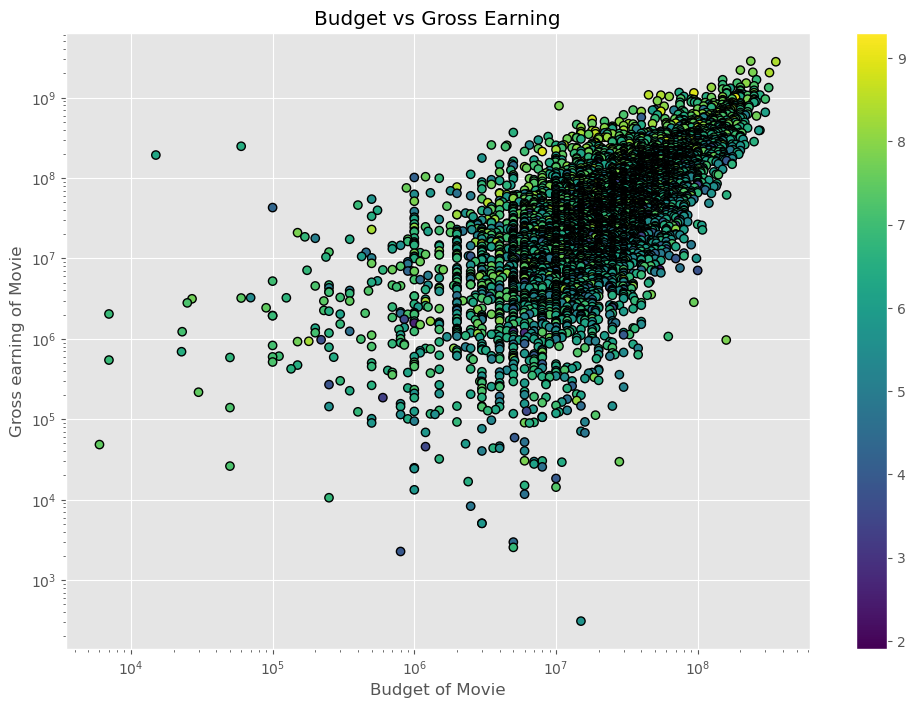

In [237]:
#Finding Co-relation between budget and gross

#Scatter plot with budget vs gross

score= df_sub['score']
plt.scatter(x= df_sub['budget'], y=df_sub['gross'], c= score, edgecolor= 'Black', linewidth=1 )
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget of Movie')
plt.ylabel('Gross earning of Movie')
plt.xscale('log')
plt.yscale('log')
cbar= plt.colorbar()

<AxesSubplot:xlabel='budget', ylabel='gross'>

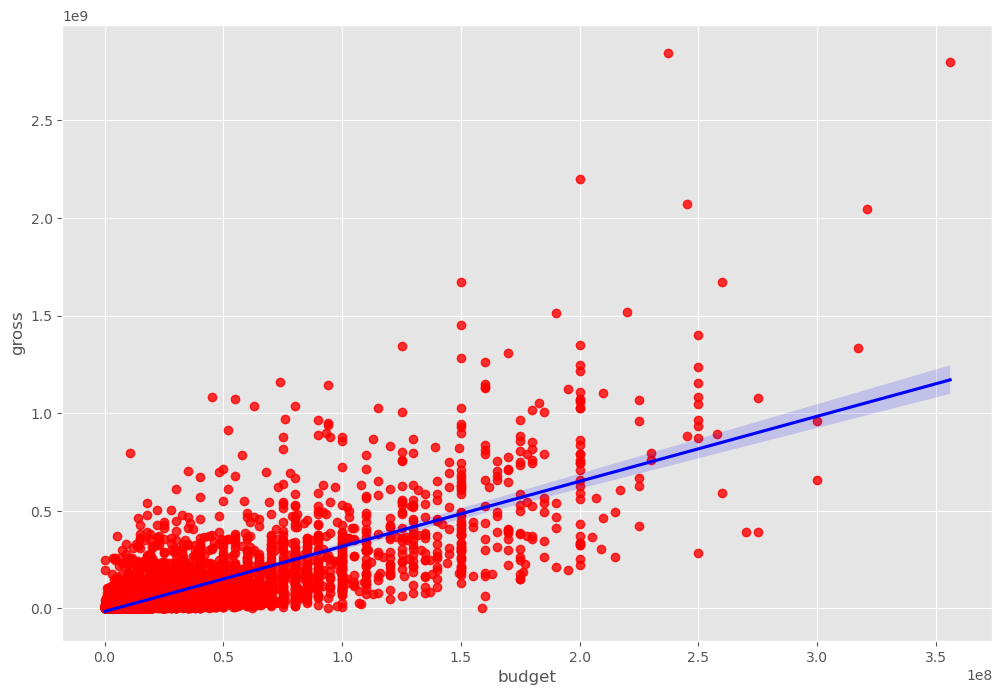

In [238]:

sns.regplot(x= 'budget', y= 'gross', data= df_sub, scatter_kws= {"color": "red"
                                                            }, line_kws={"color": "blue"} )

In [239]:
df_sub.corr()
#High correlation between budget and gross detected

,year,score,votes,budget,gross,runtime,yearNew
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearNew,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

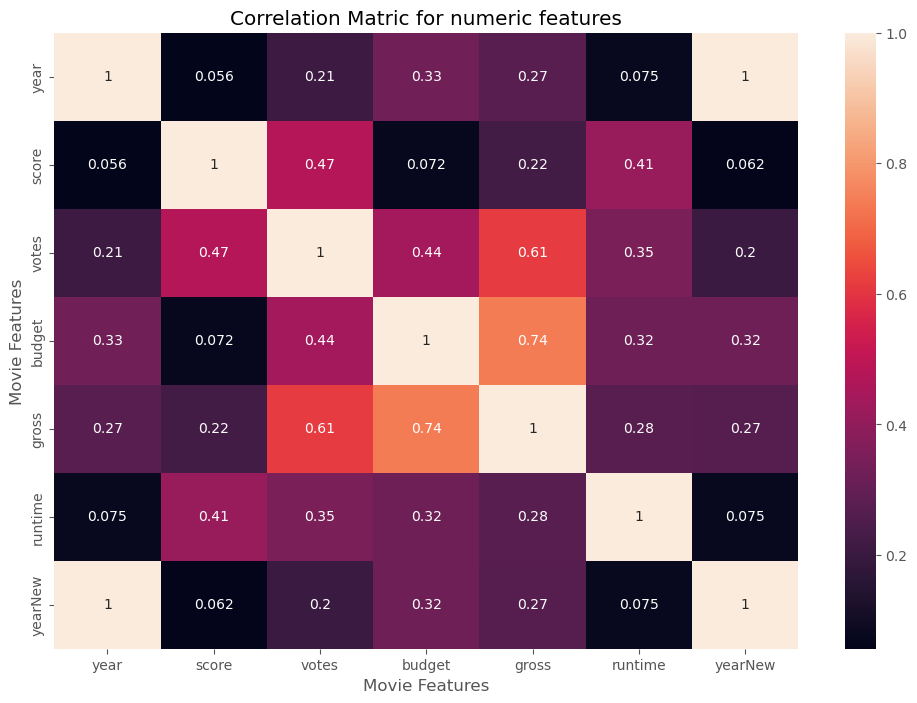

In [240]:
#Visualisation of correlation

correlation_matrix= df_sub.corr()
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [251]:
a= df_sub.corr().unstack()
a['gross']

year       0.274321
score      0.222556
votes      0.614751
budget     0.740247
gross      1.000000
runtime    0.275796
yearNew    0.268721
dtype: float64

In [243]:
a.sort_values()[a>0.5]

votes    gross      0.614751
gross    votes      0.614751
         budget     0.740247
budget   gross      0.740247
yearNew  year       0.998726
year     yearNew    0.998726
         year       1.000000
budget   budget     1.000000
gross    gross      1.000000
votes    votes      1.000000
score    score      1.000000
runtime  runtime    1.000000
yearNew  yearNew    1.000000
dtype: float64